In [6]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
ssd_detector = cv2.dnn.readNetFromCaffe("deploy.prototxt" , 
                                    "res10_300x300_ssd_iter_140000.caffemodel")

In [8]:
image = cv2.imread("batch2.jpg")
base_img = image.copy()
original_size = base_img.shape
target_size = (300, 300)
image = cv2.resize(image, target_size)
aspect_ratio_x = (original_size[1] / target_size[1])
aspect_ratio_y = (original_size[0] / target_size[0])

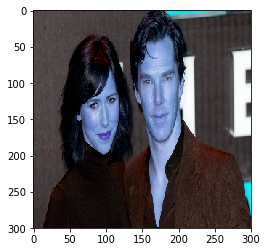

In [9]:
plt.imshow(image)
plt.show()

In [10]:
#detector expects (1, 3, 300, 300) shaped input
imageBlob = cv2.dnn.blobFromImage(image = image)
#imageBlob = np.expand_dims(np.rollaxis(image, 2, 0), axis = 0)

In [12]:
ssd_detector.setInput(imageBlob)
detections = ssd_detector.forward()

In [17]:
column_labels = ["img_id", "is_face", "confidence", "left", "top", "right", "bottom"]
df = pd.DataFrame(detections[0][0], columns = column_labels)
df

,img_id,is_face,confidence,left,top,right,bottom
0,0.0,1.0,0.991645,0.228557,0.269408,0.398797,0.651329
1,0.0,1.0,0.989028,0.481320,0.125187,0.671858,0.598299
2,0.0,1.0,0.124960,0.511102,0.108703,0.641164,0.303116
3,0.0,1.0,0.101941,0.242579,0.245949,0.308736,0.388615
4,0.0,1.0,0.098308,0.386296,0.267268,0.528474,0.606302
...,...,...,...,...,...,...,...
195,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
196,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
197,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
198,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [18]:
#0: background, 1: face
df = df[(df['is_face'] == 1) & (df['confidence']>=0.90)]
# detections_df = detections_df[detections_df['confidence']>=0.90]
df

,img_id,is_face,confidence,left,top,right,bottom
0,0.0,1.0,0.991645,0.228557,0.269408,0.398797,0.651329
1,0.0,1.0,0.989028,0.481320,0.125187,0.671858,0.598299


In [19]:
df['left'] = (df['left'] * 300).astype(int)
df['bottom'] = (df['bottom'] * 300).astype(int)
df['right'] = (df['right'] * 300).astype(int)
df['top'] = (df['top'] * 300).astype(int)

E:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
E:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
E:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [20]:
df

,img_id,is_face,confidence,left,top,right,bottom
0,0.0,1.0,0.991645,68,80,119,195
1,0.0,1.0,0.989028,144,37,201,179


Id  0 . Confidence:  99.16 %


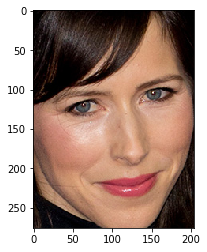

Id  1 . Confidence:  98.9 %


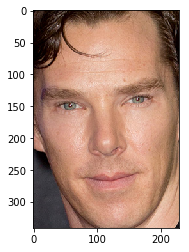

In [22]:
for i, instance in df.iterrows():
    confidence_score = str(round(100*instance["confidence"], 2))+" %"
    left = instance["left"]; right = instance["right"]
    bottom = instance["bottom"]; top = instance["top"]
    detected_face = base_img[int(top*aspect_ratio_y):int(bottom*aspect_ratio_y) ,
                    int(left*aspect_ratio_x):int(right*aspect_ratio_x)]
    print("Id ",i,". Confidence: ", confidence_score)
    plt.imshow(detected_face[:,:,::-1])
    plt.show()

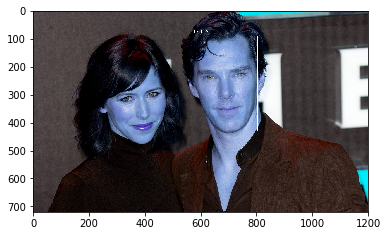

In [26]:
plt.imshow(base_img)
cv2.putText(base_img, confidence_score, (int(left*aspect_ratio_x), 
                                         int(top*aspect_ratio_y-10)), 
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
cv2.rectangle(base_img, (int(left*aspect_ratio_x), int(top*aspect_ratio_y)), 
              (int(right*aspect_ratio_x), int(bottom*aspect_ratio_y)), 
              (255, 255, 255), 1) #draw rectangle to main image
plt.show()